In [3]:
import numpy as np
from tempfile import TemporaryFile
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

%matplotlib inline

In [4]:
import numpy as np
from tempfile import TemporaryFile
import pandas as pd
import sklearn.linear_model

features = 'potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes'
features_list = features.split(',')
num_features = len(features_list)
features_list = features_list * 30

print(len(features_list))
k=0
for bucket_id in range(30):
    idx = bucket_id  * num_features
    for feature in features_list[ bucket_id  * num_features :  (bucket_id + 1 ) * num_features]:

        features_list[idx] = str(bucket_id) + "_" + features_list[idx]
        idx += 1



def train_validate_test_split(df, train_percent=.8, validate_percent=0, seed=100):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.ix[perm[:train_end]]
    validate = df.ix[perm[train_end:validate_end]]
    test = df.ix[perm[validate_end:]]
    return train, validate, test


outfile = 'alldata_buckets_3x3.npz'
npzfile = np.load(outfile)

all_data = npzfile['arr_0']
print(all_data.shape)

train_data, validate_data, test_data = train_validate_test_split(pd.DataFrame(all_data))

train_data = np.array(train_data)
validate_data = np.array(validate_data)
test_data = np.array(test_data)


train_X = train_data[:, :-1]
validate_X = validate_data[:, :-1]
test_X = test_data[:, :-1]
train_Y = train_data[:,-1]
validate_Y = validate_data[:,-1]
test_Y = test_data[:,-1]
print(train_X.shape)
print(validate_X.shape)
print(test_X.shape)

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)
epsilon = 1e-12
mean_train = np.mean(train_X, axis = 0)
std_train = np.std(train_X, axis = 0) + epsilon

test_X = (test_X - mean_train)/std_train

1080
(15965L, 865L)
(12772L, 864L)
(0L, 864L)
(3193L, 864L)


In [5]:
model = XGBClassifier()
model.fit(train_X, train_Y)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

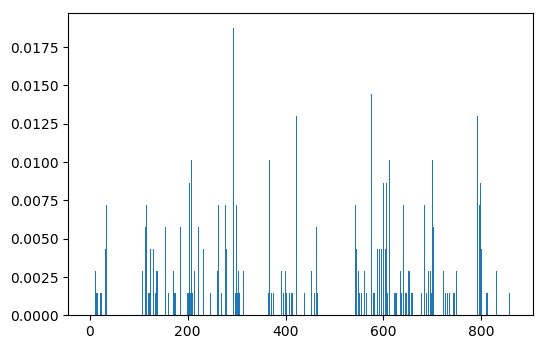

[ 0.01154401  0.          0.          0.          0.          0.          0.
  0.          0.001443    0.          0.          0.001443    0.002886    0.
  0.001443    0.          0.001443    0.          0.          0.001443    0.
  0.          0.001443    0.          0.001443    0.001443    0.          0.
  0.          0.          0.          0.00577201  0.004329    0.01154401
  0.00721501  0.002886    0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0

In [6]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()
print(model.feature_importances_)
# make predictions for test data and evaluate
y_pred = model.predict(test_X)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_Y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)



In [ ]:
train_X.shape

(12772L, 864L)

In [ ]:
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(train_X)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, train_Y)
	# eval model
	select_X_test = selection.transform(test_X)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(test_Y, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%
Thresh=0.000, n=864, Accuracy: 71.91%


In [ ]:
import sklearn.metrics
print(sklearn.metrics.accuracy_score(test_Y, predictions))

In [ ]:


print(sklearn.metrics.classification_report(test_Y, predictions))

In [ ]:
sklearn.metrics.roc_auc_score(test_Y, predictions)

In [ ]:
from sklearn.metrics import zero_one_loss
zero_one_loss(test_Y, predictions)

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,thresh = roc_curve(test_Y, y_pred)
plt.plot(fpr,tpr,[0,1],[0,1],"--")
plt.show

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 20)
rfe = rfe.fit(train_X, train_Y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)